In [2]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import dataframe_image as dfi

# PULLING IN DATA

In [3]:
public_lab = pd.read_csv('../data/WHO_NREVSS_Public_Health_Labs.csv')
early_data_10_15 = pd.read_csv('../data/WHO_NREVSS_Combined_prior_to_2015_16.csv')
pop_data = pd.read_csv('../data/nst-est2020.csv')

## CLEANING POPULATION DATA

In [4]:
# dropping unneeded columns
pop_data.drop(pop_data.columns[[0, 1, 2, 3, 6, 7, 17]], axis =1, inplace = True)
# renaming columns
pop_data = pop_data.rename(columns={'NAME': 'REGION', 'CENSUS2010POP':'2010', 'POPESTIMATE2011':'2011', 
                                    'POPESTIMATE2012':'2012', 'POPESTIMATE2013':'2013', 'POPESTIMATE2014':'2014', 
                                    'POPESTIMATE2015':'2015', 'POPESTIMATE2016':'2016', 'POPESTIMATE2017':'2017', 
                                    'POPESTIMATE2018':'2018', 'POPESTIMATE2019':'2019', 'POPESTIMATE2020':'2020'})
pop_data.head(10)

,REGION,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,308745538,311583481,313877662,316059947,318386329,320738994,323071755,325122128,326838199,328329953,329484123
1,Northeast Region,55317240,55608318,55782661,55912775,56021339,56052790,56063777,56083383,56084543,56002934,55849869
2,Midwest Region,66927001,67164092,67348275,67576524,67765576,67885682,68018175,68160342,68263019,68340091,68316744
3,South Region,114555744,116019483,117264196,118397213,119666248,121049223,122419547,123611036,124649156,125686544,126662754
4,West Region,71945553,72791588,73482530,74173435,74933166,75751299,76570256,77267367,77841481,78300384,78654756
5,Alabama,4779736,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4921532
6,Alaska,710231,722349,730810,737626,737075,738430,742575,740983,736624,733603,731158
7,Arizona,6392017,6473416,6556344,6634690,6732873,6832810,6944767,7048088,7164228,7291843,7421401
8,Arkansas,2915918,2941038,2952876,2960459,2968759,2979732,2991815,3003855,3012161,3020985,3030522
9,California,37253956,37636311,37944551,38253768,38586706,38904296,39149186,39337785,39437463,39437610,39368078


In [5]:
# Dropping uneeded rows
pop_data = pop_data.drop([0, 1, 2, 3, 4])
pop_data.head(10)

,REGION,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
5,Alabama,4779736,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4921532
6,Alaska,710231,722349,730810,737626,737075,738430,742575,740983,736624,733603,731158
7,Arizona,6392017,6473416,6556344,6634690,6732873,6832810,6944767,7048088,7164228,7291843,7421401
8,Arkansas,2915918,2941038,2952876,2960459,2968759,2979732,2991815,3003855,3012161,3020985,3030522
9,California,37253956,37636311,37944551,38253768,38586706,38904296,39149186,39337785,39437463,39437610,39368078
10,Colorado,5029196,5121900,5193660,5270774,5352637,5454328,5543844,5617421,5697155,5758486,5807719
11,Connecticut,3574097,3588632,3595211,3595792,3595697,3588561,3579830,3575324,3574561,3566022,3557006
12,Delaware,897934,907590,915518,924062,933131,942065,949989,957942,966985,976668,986809
13,District of Columbia,601723,620290,635737,651559,663603,677014,687576,697079,704147,708253,712816
14,Florida,18801310,19055607,19302016,19551678,19853880,20219111,20627237,20977089,21254926,21492056,21733312


In [6]:
# building new population dataframe for future merge
ndf = pop_data.melt(id_vars=['REGION'],
             var_name='YEAR',
             value_name='POPULATION')
ndf.head(15)

,REGION,YEAR,POPULATION
0,Alabama,2010,4779736
1,Alaska,2010,710231
2,Arizona,2010,6392017
3,Arkansas,2010,2915918
4,California,2010,37253956
5,Colorado,2010,5029196
6,Connecticut,2010,3574097
7,Delaware,2010,897934
8,District of Columbia,2010,601723
9,Florida,2010,18801310


In [7]:
# convert YEAR columns to int
ndf.YEAR = ndf.YEAR.astype(int)
ndf.head(3)

,REGION,YEAR,POPULATION
0,Alabama,2010,4779736
1,Alaska,2010,710231
2,Arizona,2010,6392017


In [8]:
# new alabama population dataframe using .loc
BAMA = ndf.loc[ndf.REGION == 'Alabama']
BAMA

,REGION,YEAR,POPULATION
0,Alabama,2010,4779736
52,Alabama,2011,4799642
104,Alabama,2012,4816632
156,Alabama,2013,4831586
208,Alabama,2014,4843737
260,Alabama,2015,4854803
312,Alabama,2016,4866824
364,Alabama,2017,4877989
416,Alabama,2018,4891628
468,Alabama,2019,4907965


# CLEANING EARLY LAB DATA

In [9]:
early_data_10_15.head(3)

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v
0,States,Alabama,2010,40,54,0,0,0,0,0,0,0,0
1,States,Alaska,2010,40,40,0,0,0,0,0,0,0,0
2,States,Arizona,2010,40,40,2.5,0,0,1,0,0,0,0


In [10]:
# dropping unneeded columns
early_data_10_15.drop(early_data_10_15.columns[[0, 5]], axis =1, inplace = True)
early_data_10_15.head(3)

,REGION,YEAR,WEEK,TOTAL SPECIMENS,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v
0,Alabama,2010,40,54,0,0,0,0,0,0,0
1,Alaska,2010,40,40,0,0,0,0,0,0,0
2,Arizona,2010,40,40,0,0,1,0,0,0,0


In [11]:
test = early_data_10_15[['REGION','YEAR', 'WEEK', 'TOTAL SPECIMENS', 'A (2009 H1N1)', 'A (H1)', 'A (H3)', 
                         'A (Subtyping not Performed)', 'A (Unable to Subtype)', 'B', 'H3N2v']]
test.columns

Index(['REGION', 'YEAR', 'WEEK', 'TOTAL SPECIMENS', 'A (2009 H1N1)', 'A (H1)',
       'A (H3)', 'A (Subtyping not Performed)', 'A (Unable to Subtype)', 'B',
       'H3N2v'],
      dtype='object')

In [12]:
test['A (H1)'].dtype
test = test[test.YEAR != 2015]

In [13]:
# converting needed columns to numeric
test[['TOTAL SPECIMENS', 'A (2009 H1N1)', 'A (H1)', 'A (H3)', 'A (Subtyping not Performed)', 'A (Unable to Subtype)', 'B', 
      'H3N2v']] = test[['TOTAL SPECIMENS', 'A (2009 H1N1)', 'A (H1)', 'A (H3)', 'A (Subtyping not Performed)', 'A (Unable to Subtype)', 
                        'B', 'H3N2v']].apply(pd.to_numeric, errors='coerce')

In [14]:
# grouping specimens by region and year to properly sum them, eliminating unneeded WEEK column
test3 = test.groupby(['REGION', 'YEAR'], as_index=False)['TOTAL SPECIMENS', 'A (2009 H1N1)', 'A (H1)', 'A (H3)',
       'A (Subtyping not Performed)', 'A (Unable to Subtype)', 'B', 'H3N2v'].sum()

test3

<ipython-input-14-06425b0e9613>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test3 = test.groupby(['REGION', 'YEAR'], as_index=False)['TOTAL SPECIMENS', 'A (2009 H1N1)', 'A (H1)', 'A (H3)',


,REGION,YEAR,TOTAL SPECIMENS,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v
0,Alabama,2010,1172.0,6.0,0.0,39.0,3.0,0.0,232.0,0.0
1,Alabama,2011,3287.0,140.0,0.0,160.0,29.0,0.0,241.0,0.0
2,Alabama,2012,3353.0,11.0,0.0,446.0,10.0,0.0,41.0,0.0
3,Alabama,2013,2420.0,64.0,0.0,109.0,6.0,0.0,39.0,0.0
4,Alabama,2014,6092.0,49.0,0.0,124.0,522.0,0.0,44.0,0.0
...,...,...,...,...,...,...,...,...,...,...
265,Wyoming,2010,320.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0
266,Wyoming,2011,792.0,42.0,0.0,89.0,19.0,0.0,48.0,0.0
267,Wyoming,2012,956.0,30.0,0.0,199.0,15.0,0.0,43.0,0.0
268,Wyoming,2013,966.0,94.0,0.0,73.0,24.0,0.0,89.0,0.0


# 2015-2021 public lab data

In [15]:
public_lab.head(3)

,REGION TYPE,REGION,SEASON_DESCRIPTION,TOTAL SPECIMENS,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v
0,States,Alabama,Season 2015-16,256,59,16,1,2,2,2,0
1,States,Alaska,Season 2015-16,4691,607,98,0,231,1,2,0
2,States,Arizona,Season 2015-16,2110,762,580,0,13,58,399,0


In [16]:
# dropping unneeded columns
public_lab.drop(public_lab.columns[[0]], axis =1, inplace = True)
# removing 'season' from season-description column
public_lab['SEASON_DESCRIPTION'] = public_lab['SEASON_DESCRIPTION'].str.replace(r'Season ', '')

In [17]:
public_lab.head(3)

,REGION,SEASON_DESCRIPTION,TOTAL SPECIMENS,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v
0,Alabama,2015-16,256,59,16,1,2,2,2,0
1,Alaska,2015-16,4691,607,98,0,231,1,2,0
2,Arizona,2015-16,2110,762,580,0,13,58,399,0


In [18]:
# removing unneeded numbers from years
public_lab['SEASON_DESCRIPTION'] = public_lab['SEASON_DESCRIPTION'].str.replace(r'-\d{2}', '', regex = True)
# renaming season description column to year
public_lab = public_lab.rename(columns={'SEASON_DESCRIPTION' : 'YEAR'})
public_lab.head(3000)

,REGION,YEAR,TOTAL SPECIMENS,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v
0,Alabama,2015,256,59,16,1,2,2,2,0
1,Alaska,2015,4691,607,98,0,231,1,2,0
2,Arizona,2015,2110,762,580,0,13,58,399,0
3,Arkansas,2015,128,20,8,0,1,12,0,0
4,California,2015,12820,1462,854,35,775,309,803,0
...,...,...,...,...,...,...,...,...,...,...
373,Wisconsin,2021,1824,0,189,22,3,1,0,0
374,Wyoming,2021,15201,0,155,181,2,0,0,0
375,Puerto Rico,2021,60,0,0,0,0,0,0,0
376,Virgin Islands,2021,X,X,X,X,X,X,X,X


In [19]:
public_lab['A (H3)'].dtype

dtype('O')

In [20]:
public_lab['TOTAL SPECIMENS'].dtype

dtype('O')

In [21]:
public_lab.columns

Index(['REGION', 'YEAR', 'TOTAL SPECIMENS', 'A (2009 H1N1)', 'A (H3)',
       'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 'H3N2v'],
      dtype='object')

In [22]:
# converting needed columns to numeric
public_lab[['TOTAL SPECIMENS', 'A (2009 H1N1)', 'A (H3)', 'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 
            'H3N2v']] = public_lab[['TOTAL SPECIMENS', 'A (2009 H1N1)', 'A (H3)','A (Subtyping not Performed)', 'B', 'BVic', 
                                    'BYam', 'H3N2v']].apply(pd.to_numeric, errors='coerce')
public_lab.head(3)

,REGION,YEAR,TOTAL SPECIMENS,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v
0,Alabama,2015,256.0,59.0,16.0,1.0,2.0,2.0,2.0,0.0
1,Alaska,2015,4691.0,607.0,98.0,0.0,231.0,1.0,2.0,0.0
2,Arizona,2015,2110.0,762.0,580.0,0.0,13.0,58.0,399.0,0.0


In [23]:
# test3 is older data to be merged
test3.head(3)

,REGION,YEAR,TOTAL SPECIMENS,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v
0,Alabama,2010,1172.0,6.0,0.0,39.0,3.0,0.0,232.0,0.0
1,Alabama,2011,3287.0,140.0,0.0,160.0,29.0,0.0,241.0,0.0
2,Alabama,2012,3353.0,11.0,0.0,446.0,10.0,0.0,41.0,0.0


In [24]:
# converting column YEAR to int
public_lab.YEAR = public_lab.YEAR.astype(int)
public_lab.head()

,REGION,YEAR,TOTAL SPECIMENS,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v
0,Alabama,2015,256.0,59.0,16.0,1.0,2.0,2.0,2.0,0.0
1,Alaska,2015,4691.0,607.0,98.0,0.0,231.0,1.0,2.0,0.0
2,Arizona,2015,2110.0,762.0,580.0,0.0,13.0,58.0,399.0,0.0
3,Arkansas,2015,128.0,20.0,8.0,0.0,1.0,12.0,0.0,0.0
4,California,2015,12820.0,1462.0,854.0,35.0,775.0,309.0,803.0,0.0


# Merging and cleaning new dataframes

In [25]:
# creating new dataframe by concating test3(older data) with public lab(newer data)
flu_df = pd.concat([test3, public_lab], axis = 0).fillna(0)

In [26]:
flu_df.reset_index()
flu_df.head(15)

,REGION,YEAR,TOTAL SPECIMENS,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam
0,Alabama,2010,1172.0,6.0,0.0,39.0,3.0,0.0,232.0,0.0,0.0,0.0
1,Alabama,2011,3287.0,140.0,0.0,160.0,29.0,0.0,241.0,0.0,0.0,0.0
2,Alabama,2012,3353.0,11.0,0.0,446.0,10.0,0.0,41.0,0.0,0.0,0.0
3,Alabama,2013,2420.0,64.0,0.0,109.0,6.0,0.0,39.0,0.0,0.0,0.0
4,Alabama,2014,6092.0,49.0,0.0,124.0,522.0,0.0,44.0,0.0,0.0,0.0
5,Alaska,2010,460.0,0.0,0.0,12.0,0.0,0.0,2.0,0.0,0.0,0.0
6,Alaska,2011,3522.0,343.0,0.0,526.0,13.0,0.0,39.0,0.0,0.0,0.0
7,Alaska,2012,4697.0,117.0,0.0,652.0,1.0,0.0,334.0,0.0,0.0,0.0
8,Alaska,2013,3236.0,348.0,0.0,192.0,9.0,0.0,139.0,0.0,0.0,0.0
9,Alaska,2014,4432.0,193.0,0.0,912.0,63.0,0.0,102.0,0.0,0.0,0.0


In [27]:
# adding a 'Total' column, totalling all subtypes into a single total of positive flu cases
flu_df['Total'] = flu_df['A (2009 H1N1)']+flu_df['A (H1)']+flu_df['A (H3)']+flu_df['A (Subtyping not Performed)']+flu_df['A (Unable to Subtype)']+flu_df['B']+flu_df['H3N2v']+flu_df['BVic']+flu_df['BYam']

In [28]:
# merging flu_df(the full dataframes of flu specific data) and ndf(population data)
flupop = pd.merge(flu_df, ndf, how='left', left_on = ['REGION', 'YEAR'], right_on = ['REGION', 'YEAR'])
flupop.head(15)

,REGION,YEAR,TOTAL SPECIMENS,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total,POPULATION
0,Alabama,2010,1172.0,6.0,0.0,39.0,3.0,0.0,232.0,0.0,0.0,0.0,280.0,4779736.0
1,Alabama,2011,3287.0,140.0,0.0,160.0,29.0,0.0,241.0,0.0,0.0,0.0,570.0,4799642.0
2,Alabama,2012,3353.0,11.0,0.0,446.0,10.0,0.0,41.0,0.0,0.0,0.0,508.0,4816632.0
3,Alabama,2013,2420.0,64.0,0.0,109.0,6.0,0.0,39.0,0.0,0.0,0.0,218.0,4831586.0
4,Alabama,2014,6092.0,49.0,0.0,124.0,522.0,0.0,44.0,0.0,0.0,0.0,739.0,4843737.0
5,Alaska,2010,460.0,0.0,0.0,12.0,0.0,0.0,2.0,0.0,0.0,0.0,14.0,710231.0
6,Alaska,2011,3522.0,343.0,0.0,526.0,13.0,0.0,39.0,0.0,0.0,0.0,921.0,722349.0
7,Alaska,2012,4697.0,117.0,0.0,652.0,1.0,0.0,334.0,0.0,0.0,0.0,1104.0,730810.0
8,Alaska,2013,3236.0,348.0,0.0,192.0,9.0,0.0,139.0,0.0,0.0,0.0,688.0,737626.0
9,Alaska,2014,4432.0,193.0,0.0,912.0,63.0,0.0,102.0,0.0,0.0,0.0,1270.0,737075.0


In [29]:
# adding a column to calculate an infection per capita
flupop['per 10,000'] = (flupop['Total'] / flupop['POPULATION']) * 10000
flupop.head(10)

,REGION,YEAR,TOTAL SPECIMENS,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total,POPULATION,"per 10,000"
0,Alabama,2010,1172.0,6.0,0.0,39.0,3.0,0.0,232.0,0.0,0.0,0.0,280.0,4779736.0,0.585806
1,Alabama,2011,3287.0,140.0,0.0,160.0,29.0,0.0,241.0,0.0,0.0,0.0,570.0,4799642.0,1.187589
2,Alabama,2012,3353.0,11.0,0.0,446.0,10.0,0.0,41.0,0.0,0.0,0.0,508.0,4816632.0,1.054679
3,Alabama,2013,2420.0,64.0,0.0,109.0,6.0,0.0,39.0,0.0,0.0,0.0,218.0,4831586.0,0.451198
4,Alabama,2014,6092.0,49.0,0.0,124.0,522.0,0.0,44.0,0.0,0.0,0.0,739.0,4843737.0,1.525682
5,Alaska,2010,460.0,0.0,0.0,12.0,0.0,0.0,2.0,0.0,0.0,0.0,14.0,710231.0,0.197119
6,Alaska,2011,3522.0,343.0,0.0,526.0,13.0,0.0,39.0,0.0,0.0,0.0,921.0,722349.0,12.750070
7,Alaska,2012,4697.0,117.0,0.0,652.0,1.0,0.0,334.0,0.0,0.0,0.0,1104.0,730810.0,15.106526
8,Alaska,2013,3236.0,348.0,0.0,192.0,9.0,0.0,139.0,0.0,0.0,0.0,688.0,737626.0,9.327220
9,Alaska,2014,4432.0,193.0,0.0,912.0,63.0,0.0,102.0,0.0,0.0,0.0,1270.0,737075.0,17.230268


In [30]:
# creating individual dataframes for each year
year2010 = flu_df.loc[flu_df.YEAR == 2010]
year2011 = flu_df.loc[flu_df.YEAR == 2011]
year2012 = flu_df.loc[flu_df.YEAR == 2012]
year2013 = flu_df.loc[flu_df.YEAR == 2013]
year2014 = flu_df.loc[flu_df.YEAR == 2014]
year2015 = flu_df.loc[flu_df.YEAR == 2015]
year2016 = flu_df.loc[flu_df.YEAR == 2016]
year2017 = flu_df.loc[flu_df.YEAR == 2017]
year2018 = flu_df.loc[flu_df.YEAR == 2018]
year2019 = flu_df.loc[flu_df.YEAR == 2019]
year2020 = flu_df.loc[flu_df.YEAR == 2020]
year2021 = flu_df.loc[flu_df.YEAR == 2021]

# total flu cases in 2020
year2019.Total.sum()

43529.0

In [31]:
# total flu cases in 2019
year2020.Total.sum()

353.0

In [32]:
year2020.head()

,REGION,YEAR,TOTAL SPECIMENS,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total
270,Alabama,2020,15011.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,6.0
271,Alaska,2020,226.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,7.0
272,Arizona,2020,261.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
273,Arkansas,2020,262.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,California,2020,3194.0,0.0,0.0,3.0,10.0,0.0,6.0,0.0,1.0,3.0,23.0


In [33]:
year2019.head(5)

,REGION,YEAR,TOTAL SPECIMENS,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total
216,Alabama,2019,690.0,174.0,0.0,6.0,0.0,0.0,5.0,0.0,123.0,0.0,308.0
217,Alaska,2019,1675.0,102.0,0.0,25.0,6.0,0.0,375.0,0.0,0.0,0.0,508.0
218,Arizona,2019,1676.0,632.0,0.0,33.0,0.0,0.0,38.0,0.0,560.0,8.0,1271.0
219,Arkansas,2019,782.0,146.0,0.0,1.0,4.0,0.0,54.0,0.0,45.0,0.0,250.0
220,California,2019,10933.0,3055.0,0.0,272.0,182.0,0.0,475.0,0.0,1742.0,36.0,5762.0


In [34]:
# creating new dataframes for particular states of interest
AL = flu_df.loc[flu_df.REGION == 'Alabama']
TN = flu_df.loc[flu_df.REGION == 'Tennessee']
OR = flu_df.loc[flu_df.REGION == 'Oregon']
HI = flu_df.loc[flu_df.REGION == 'Hawaii']
NY = flu_df.loc[flu_df.REGION == 'New York']
WY = flu_df.loc[flu_df.REGION == 'Wyoming']
FL = flu_df.loc[flu_df.REGION == 'Florida']
PR = flu_df.loc[flu_df.REGION == 'Puerto Rico']
# PR
FL

,REGION,YEAR,TOTAL SPECIMENS,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total
45,Florida,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,Florida,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,Florida,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,Florida,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,Florida,2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Florida,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,Florida,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,Florida,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,Florida,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225,Florida,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
WY

,REGION,YEAR,TOTAL SPECIMENS,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total
265,Wyoming,2010,320.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,9.0
266,Wyoming,2011,792.0,42.0,0.0,89.0,19.0,0.0,48.0,0.0,0.0,0.0,198.0
267,Wyoming,2012,956.0,30.0,0.0,199.0,15.0,0.0,43.0,0.0,0.0,0.0,287.0
268,Wyoming,2013,966.0,94.0,0.0,73.0,24.0,0.0,89.0,0.0,0.0,0.0,280.0
269,Wyoming,2014,1026.0,140.0,0.0,121.0,19.0,0.0,13.0,0.0,0.0,0.0,293.0
50,Wyoming,2015,494.0,104.0,0.0,27.0,1.0,0.0,2.0,0.0,1.0,42.0,177.0
104,Wyoming,2016,839.0,2.0,0.0,273.0,3.0,0.0,12.0,0.0,1.0,29.0,320.0
158,Wyoming,2017,743.0,39.0,0.0,142.0,1.0,0.0,16.0,0.0,2.0,107.0,307.0
212,Wyoming,2018,349.0,91.0,0.0,79.0,1.0,0.0,4.0,0.0,3.0,4.0,182.0
266,Wyoming,2019,6771.0,50.0,0.0,1.0,2.0,0.0,4.0,0.0,25.0,0.0,82.0


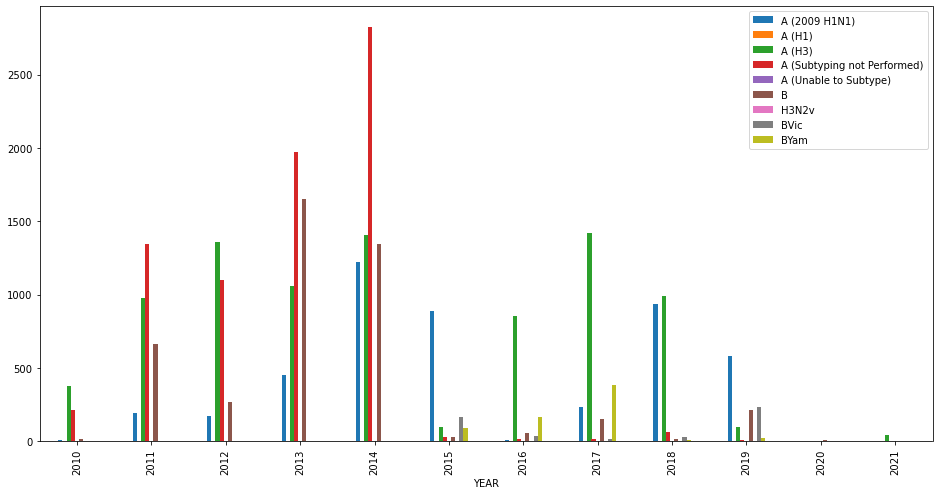

In [36]:
NY.plot(x='YEAR', y=['A (2009 H1N1)','A (H1)','A (H3)','A (Subtyping not Performed)', 
                         'A (Unable to Subtype)', 'B', 'H3N2v', 'BVic', 'BYam'], kind = 'bar', figsize = (16, 8))
plt.show;

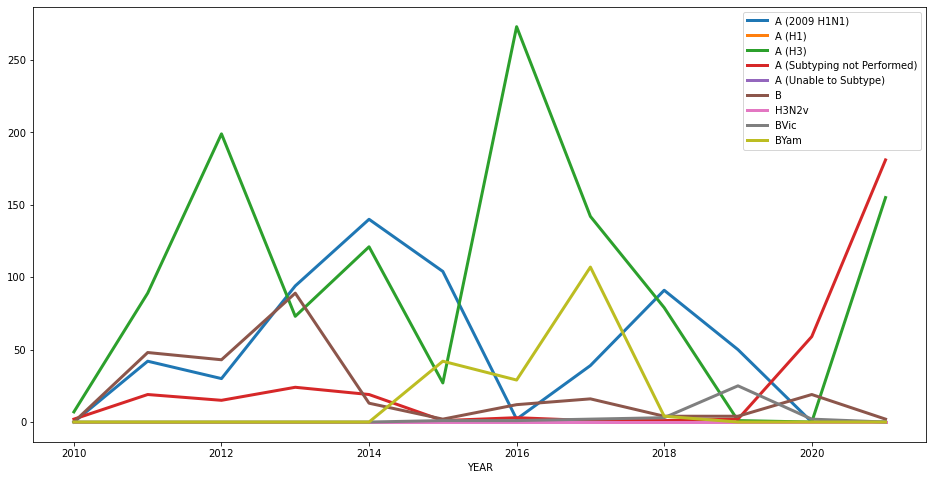

In [37]:
WY.plot(x='YEAR', y=['A (2009 H1N1)','A (H1)','A (H3)','A (Subtyping not Performed)', 
                         'A (Unable to Subtype)', 'B', 'H3N2v', 'BVic', 'BYam'], kind = 'line', linewidth=3, figsize = (16, 8))
plt.show
plt.savefig('../plots/flu_subtype.png')

In [38]:
# dropping new york city and the virgin islands due to them being empty
flupop.drop(flupop[flupop['REGION'] == 'Virgin Islands'].index, inplace=True)
flupop.drop(flupop[flupop['REGION'] == 'New York City'].index, inplace=True)

In [39]:
flupop.REGION.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

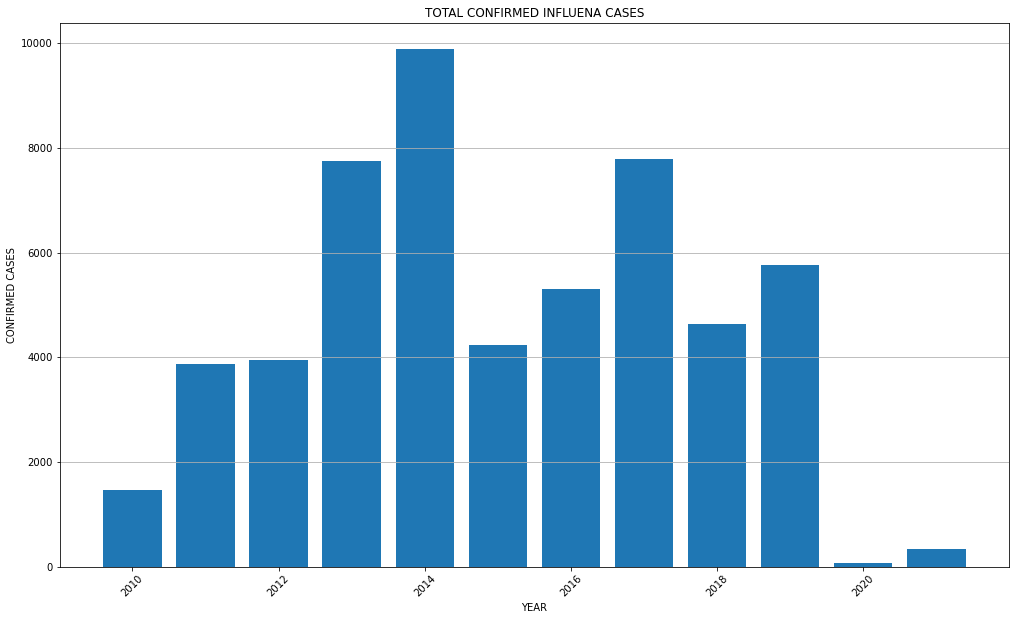

In [40]:
fig1 = plt.figure(figsize = (17, 10))
plt.bar(flupop.YEAR, flupop['Total'])
plt.xticks(rotation = 45)
plt.grid(b=None , which='both', axis='y')
plt.xlabel('YEAR')
plt.ylabel('CONFIRMED CASES')
plt.title('TOTAL CONFIRMED INFLUENA CASES')
# plt.ylim([0, 200000])
plt.show()
fig1.savefig('../plots/confirmed_cases.png')

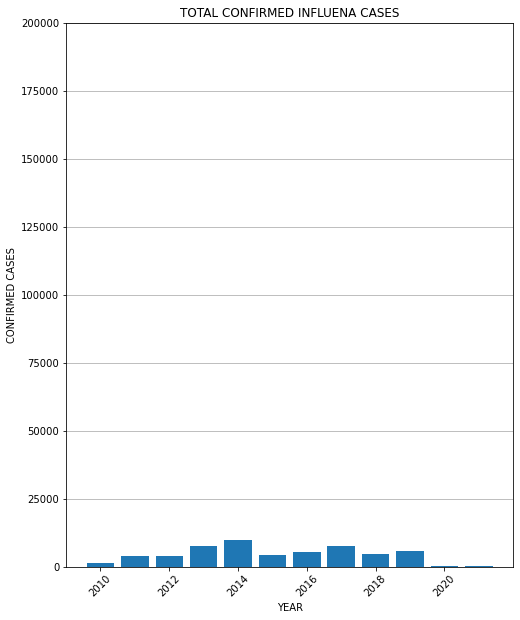

In [41]:
fig2 = plt.figure(figsize = (8, 10))
plt.bar(flupop.YEAR, flupop['Total'])
plt.xticks(rotation = 45)
plt.grid(b=None , which='both', axis='y')
plt.xlabel('YEAR')
plt.ylabel('CONFIRMED CASES')
plt.title('TOTAL CONFIRMED INFLUENA CASES')
plt.ylim([0, 200000])
plt.show()
fig2.savefig('../plots/confirmed_cases2.png')

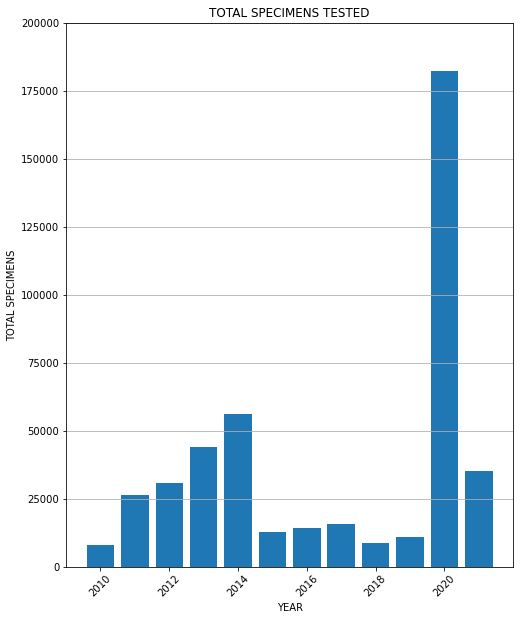

In [42]:
fig3 = plt.figure(figsize = (8, 10))
plt.bar(flupop.YEAR, flupop['TOTAL SPECIMENS'])
plt.xticks(rotation = 45)
plt.grid(b=None , which='both', axis='y')
plt.xlabel('YEAR')
plt.ylabel('TOTAL SPECIMENS')
plt.title('TOTAL SPECIMENS TESTED')
plt.ylim([0, 200000])
plt.show()
fig3.savefig('../plots/specimens.png')

In [43]:
# creating dataframe from flupop, focusing on only 2019
flupop19 = flupop.loc[flupop.YEAR == 2019].sort_values('per 10,000', ascending = False)
flupop19.head(3)

,REGION,YEAR,TOTAL SPECIMENS,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total,POPULATION,"per 10,000"
497,Hawaii,2019,3381.0,1283.0,0.0,64.0,19.0,0.0,3.0,1.0,441.0,1.0,1812.0,1415615.0,12.800090
527,South Dakota,2019,1758.0,531.0,0.0,6.0,13.0,0.0,53.0,0.0,481.0,3.0,1087.0,887127.0,12.253037
520,North Dakota,2019,1022.0,278.0,0.0,20.0,3.0,0.0,60.0,0.0,384.0,2.0,747.0,763724.0,9.781020


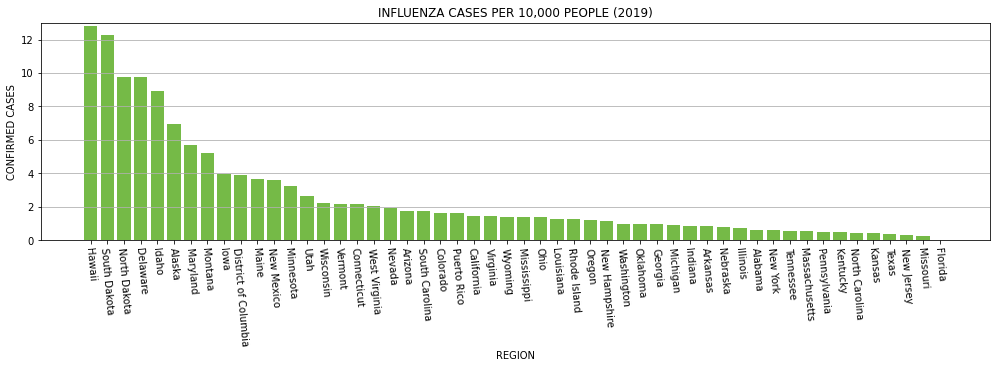

In [44]:
fig4 = plt.figure(figsize = (17, 4))
plt.bar(flupop19.REGION, flupop19['per 10,000'], color = (0.4,0.7,0.2,0.9))
plt.grid(b=None , which='both', axis='y')
plt.xticks(rotation = 275)
plt.xlabel('REGION')
plt.ylabel('CONFIRMED CASES')
plt.title('INFLUENZA CASES PER 10,000 PEOPLE (2019)')
plt.ylim([0, 13])
plt.show()
fig4.savefig('../plots/2019_per_pop.png')

In [45]:
# creating dataframe from flupop, focusing on only 2020
flupop20 = flupop.loc[flupop.YEAR == 2020].sort_values('per 10,000', ascending = False)
flupop20.head(3)

,REGION,YEAR,TOTAL SPECIMENS,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total,POPULATION,"per 10,000"
590,Wyoming,2020,126019.0,0.0,0.0,0.0,59.0,0.0,19.0,0.0,2.0,0.0,80.0,582328.0,1.373796
567,Nebraska,2020,45796.0,5.0,0.0,5.0,5.0,0.0,8.0,0.0,0.0,0.0,23.0,1937552.0,0.118706
560,Maryland,2020,3592.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,6055802.0,0.099079


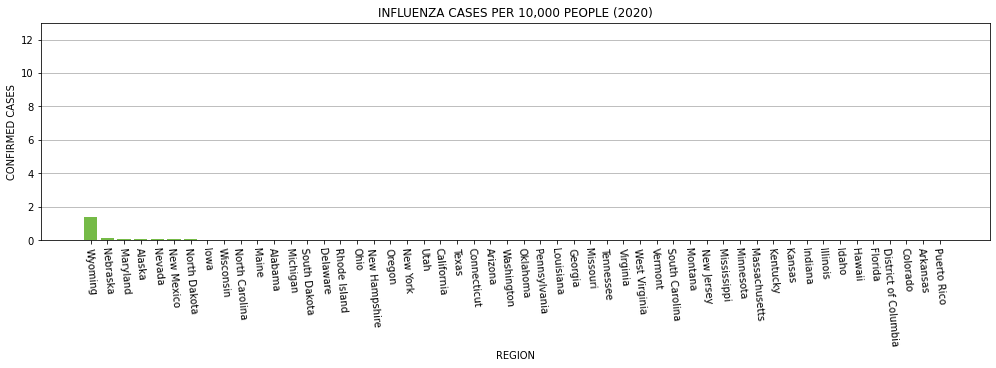

In [46]:
fig5 = plt.figure(figsize = (17, 4))
plt.bar(flupop20.REGION, flupop20['per 10,000'], color = (0.4,0.7,0.2,0.9))
plt.grid(b=None , which='both', axis='y')
plt.xticks(rotation = 275)
plt.xlabel('REGION')
plt.ylabel('CONFIRMED CASES')
plt.title('INFLUENZA CASES PER 10,000 PEOPLE (2020)')
plt.ylim([0, 13])
plt.show()
fig5.savefig('../plots/2020_per_pop.png')

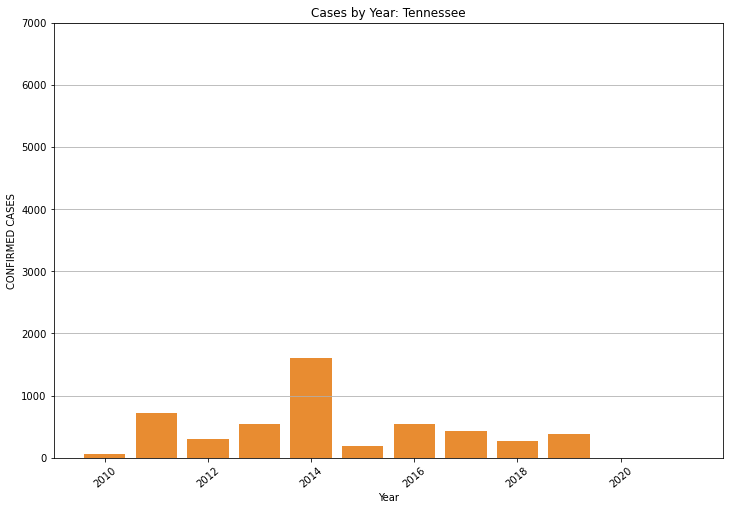

In [47]:
fig6 = plt.figure(figsize = (12,8))
plt.bar('YEAR', 'Total', data = TN, color = (0.9,0.5,0.1,0.9))
plt.grid(b=None , which='both', axis='y')

plt.xticks(rotation = 40)
plt.ylabel('CONFIRMED CASES')
plt.xlabel('Year')
plt.title('Cases by Year: Tennessee')
plt.ylim([0, 7000])
# plt.show()
fig6.savefig('../plots/TN_cases.png', dpi = 300, bbox_inches = 'tight')

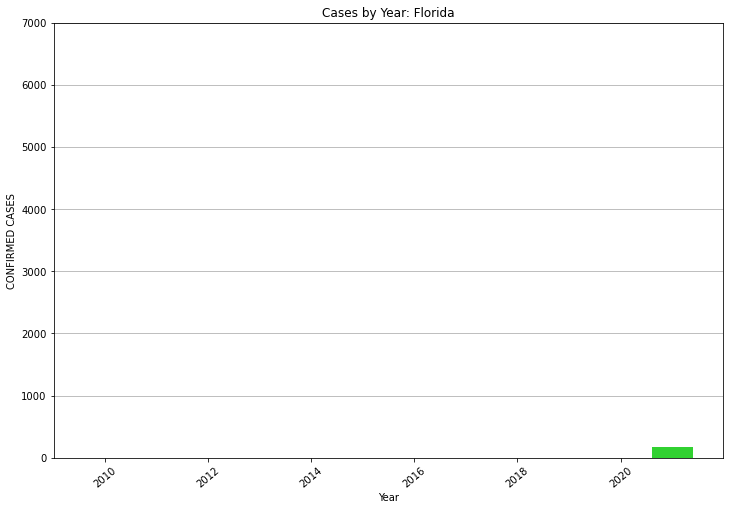

In [48]:
fig7 = plt.figure(figsize = (12,8))
plt.bar('YEAR', 'Total', data = FL, color = (0.1,0.8,0.1,0.9))
plt.grid(b=None , which='both', axis='y')

plt.xticks(rotation = 40)
plt.ylabel('CONFIRMED CASES')
plt.xlabel('Year')
plt.title('Cases by Year: Florida')
plt.ylim([0, 7000])
# plt.show()
fig7.savefig('../plots/FL_cases.png')

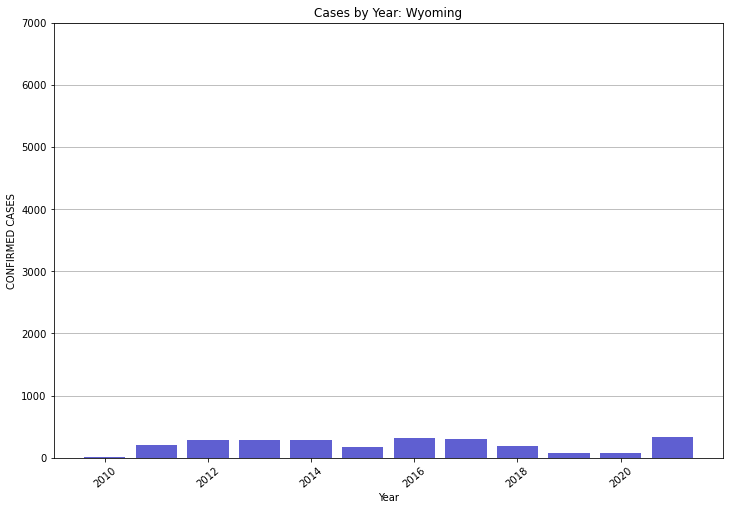

In [49]:
fig8 = plt.figure(figsize = (12,8))
plt.bar('YEAR', 'Total', data = WY, color = (0.3,0.3,0.8,0.9))
plt.grid(b=None , which='both', axis='y')

plt.xticks(rotation = 40)
plt.ylabel('CONFIRMED CASES')
plt.xlabel('Year')
plt.title('Cases by Year: Wyoming')
plt.ylim([0, 7000])
plt.show()
fig8.savefig('../plots/WY_cases.png')

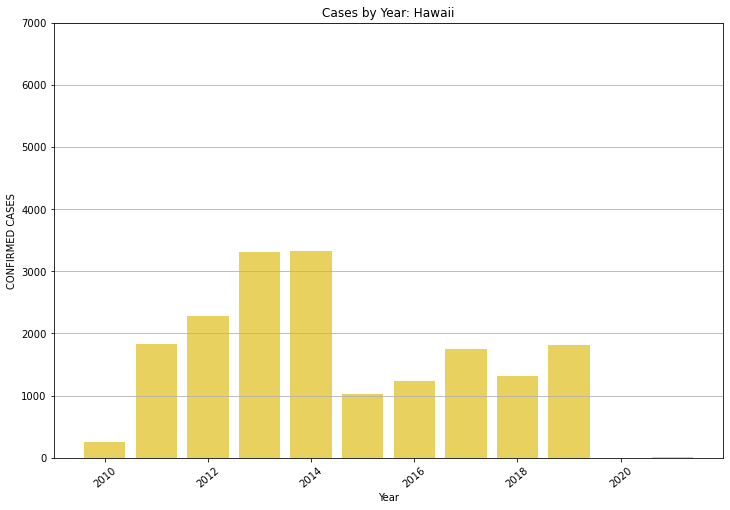

In [50]:
fig9 = plt.figure(figsize = (12,8))
plt.bar('YEAR', 'Total', data = HI, color = (0.9,0.8,0.3,0.9))
plt.grid(b=None , which='both', axis='y')

plt.xticks(rotation = 40)
plt.ylabel('CONFIRMED CASES')
plt.xlabel('Year')
plt.title('Cases by Year: Hawaii')
plt.ylim([0, 7000])
plt.show()
fig9.savefig('../plots/HI_cases.png')

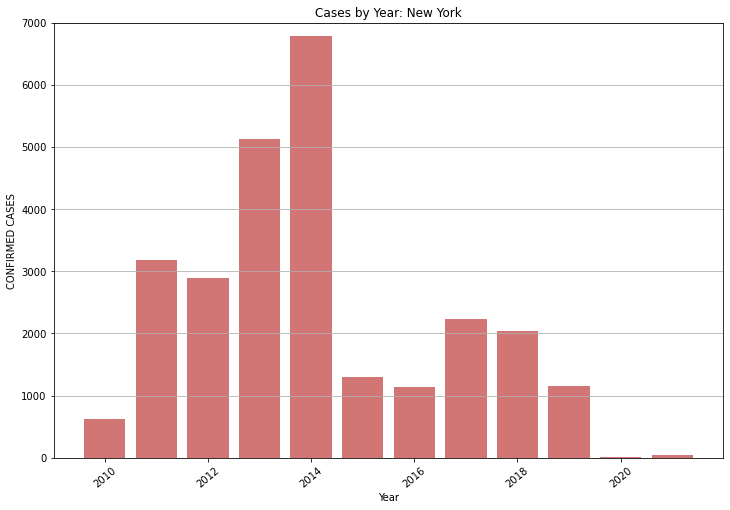

In [51]:
fig10 = plt.figure(figsize = (12,8))
plt.bar('YEAR', 'Total', data = NY, color = (0.8,0.4,0.4,0.9))
plt.grid(b=None , which='both', axis='y')

plt.xticks(rotation = 40)
plt.ylabel('CONFIRMED CASES')
plt.xlabel('Year')
plt.title('Cases by Year: New York')
plt.ylim([0, 7000])
plt.show()
# fig10.savefig('../plots/NY_cases.png')